## 1. Loading your friend's data into a dictionary
<p><img src="https://assets.datacamp.com/production/project_1237/img/netflix.jpg" alt="Someone's feet on table facing a television"></p>
<p>Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by <a href="https://www.marketwatch.com/story/netflix-shares-close-up-8-for-yet-another-record-high-2020-07-10">market capitalization</a>, boasting over 200 million subscribers as of <a href="https://www.cbsnews.com/news/netflix-tops-200-million-subscribers-but-faces-growing-challenge-from-disney-plus/">January 2021</a>.</p>
<p>Given the large number of movies and series available on the platform, it is a perfect opportunity to flex our data manipulation skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. For their first order of business, they have been performing some analyses, and they believe that the average duration of movies has been declining. </p>
<p>As evidence of this, they have provided us with the following information. For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.</p>
<p>If we're going to be working with this data, we know a good place to start would be to probably start working with <code>pandas</code>. But first we'll need to create a DataFrame from scratch. Let's start by creating a Python object covered in <a href="https://learn.datacamp.com/courses/intermediate-python">Intermediate Python</a>: a dictionary!</p>

In [6]:
# Create the years and durations lists
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {"years" : years, "durations" : durations}

#for i, key in enumerate(years):
#    movie_dict[key] = durations[i]

# Print the dictionary

print(movie_dict)


{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


In [7]:
%%nose

test_years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
test_durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]
test_movie_dict = {'years': test_years, 'durations': test_durations}

def test_years_list():
    assert (type(years) == list), \
    'Did you correctly initalize a `years` as a list?'
    assert len(test_years) == len(years), \
    "Did you correctly define the `years` list as a list containing **all** 10 years from 2011 to 2020?"
    assert test_years == years, \
    "Did you correctly define the `years` list as a list containing the years (in order) from 2011 to 2020?"
    
def test_durations_list():
    assert (type(durations) == list), \
    'Did you correctly initalize a `durations` as a list?'
    assert len(test_durations) == len(durations), \
    "Did you correctly define the `durations` list as a list containing **all** 10 average durations our friend provided us?"
    assert test_durations == durations, \
    "Did you correctly define the `durations` list as a list containing all of the average movie durations (in order) that our friend provided us?"
    
def test_movie_dict_dict():
    assert (type(movie_dict) == dict), \
    'Did you correctly initalize `movie_dict` as a dictionary?'
    assert len(test_durations) == len(durations), \
    "Did you correctly define the `movie_dict` dictionary as a two-element dictionary containing the years and durations?"
    assert list(movie_dict.keys()) == ['years', 'durations'], \
    "Did you correctly define the `movie_dict` dictionary as a two-element dictionary containing the keys `\"years\"` and `\"durations\"`?"
    assert list(movie_dict['years']) == test_years, \
    "Does your `movie_dict` dictionary contain a key `\"years\"` with the value set to the `years` list you created above?"
    assert list(movie_dict['durations']) == test_durations, \
    "Does your `movie_dict` dictionary contain a key `\"durations\"` with the value set to the `durations` list you created above?"

3/3 tests passed


## 2. Creating a DataFrame from a dictionary
<p>To convert our dictionary <code>movie_dict</code> to a <code>pandas</code> DataFrame, we will first need to import the library under its usual alias. We'll also want to inspect our DataFrame to ensure it was created correctly. Let's perform these steps now.</p>

In [8]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


In [9]:
%%nose

def test_pandas_loaded():
    assert 'pd' in globals(), \
    'Did you correctly import the `pandas` library under the alias `pd`?'
    
import pandas as pd

test_years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
test_durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]
test_movie_dict = {'years': test_years, 'durations': test_durations}
test_netflix_df = pd.DataFrame(test_movie_dict)

def test_netflix_df_df():
    assert test_netflix_df.equals(durations_df), \
    "Did you correctly create the `netflix_df` DataFrame using your `movie_dict` dictionary?"

2/2 tests passed


## 3. A visual inspection of our data
<p>Alright, we now have a <code>pandas</code> DataFrame, the most common way to work with tabular data in Python. Now back to the task at hand. We want to follow up on our friend's assertion that movie lengths have been decreasing over time. A great place to start will be a visualization of the data.</p>
<p>Given that the data is continuous, a line plot would be a good choice, with the dates represented along the x-axis and the average length in minutes along the y-axis. This will allow us to easily spot any trends in movie durations. There are many ways to visualize data in Python, but <code>matploblib.pyplot</code> is one of the most common packages to do so.</p>
<p><em>Note: In order for us to correctly test your plot, you will need to initalize a <code>matplotlib.pyplot</code> Figure object, which we have already provided in the cell below. You can continue to create your plot as you have learned in Intermediate Python.</em></p>

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

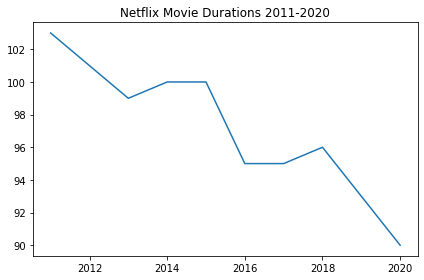

In [10]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(years, durations)


# Create a title

#plt.title("test")
#plt.title('testing')
titleVar=str("Netflix Movie Durations 2011-2020")
plt.title(titleVar)


# Show the plot
plt.scatter

In [11]:
%%nose

import re

def test_fig_exists():
    import matplotlib
    # Extra function to test for existence of fig to allow custom feedback
    def test_fig():
        try:
            fig
            return True
        except:
            return False
    assert (test_fig() == True), \
    'Did you correctly initalize a `fig` object using `fig = plt.figure()`?'
    assert (type(fig) == matplotlib.figure.Figure), \
    'Did you correctly initalize a `fig` object using `fig = plt.figure()`?'

test_years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
test_durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]
test_movie_dict = {'years': test_years, 'durations': test_durations}
test_netflix_df = pd.DataFrame(test_movie_dict)

x_axis_data = test_netflix_df['years'].values
y_axis_data = test_netflix_df['durations'].values

def test_matplotlib_loaded():
    assert 'plt' in globals(), \
    'Did you correctly import `matplotlib.pyplot` under the alias `plt`?'
    
try:
    # Generate x and y axis containers
    stu_yaxis = fig.gca().get_lines()[0].get_ydata()
    stu_xaxis = fig.gca().get_lines()[0].get_xdata()
    title = fig.gca()._axes.get_title()
    
except:
    title = 'null'
    stu_yaxis = 'null'
    stu_xaxis = 'null'

# Tests

def test_y_axis():
    assert (stu_yaxis == y_axis_data).all(), \
    'Are you correctly plotting the average movie durations on the y-axis?'
    
def test_x_axis():
    assert (stu_xaxis == x_axis_data).all(), \
    'Are you correctly plotting the release years on the x axis?'
    
def test_title():
    assert (re.search('netflix\s+movie\s+durations\s+2011\s*\-\s*2020', title, re.IGNORECASE)), \
    'Did you set the correct title?'

5/5 tests passed


## 4. Loading the rest of the data from a CSV
<p>Well, it looks like there is something to the idea that movie lengths have decreased over the past ten years! But equipped only with our friend's aggregations, we're limited in the further explorations we can perform. There are a few questions about this trend that we are currently unable to answer, including:</p>
<ol>
<li>What does this trend look like over a longer period of time?</li>
<li>Is this explainable by something like the genre of entertainment?</li>
</ol>
<p>Upon asking our friend for the original CSV they used to perform their analyses, they gladly oblige and send it. We now have access to the CSV file, available at the path <code>"datasets/netflix_data.csv"</code>. Let's create another DataFrame, this time with all of the data. Given the length of our friend's data, printing the whole DataFrame is probably not a good idea, so we will inspect it by printing only the first five rows.</p>

In [12]:
# Read in the CSV as a DataFrame
import pandas as pd
netflix_df = pd.read_csv('datasets/netflix_data.csv')

# Print the first five rows of the DataFrame
print(netflix_df.iloc[0:5])

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

In [13]:
%%nose
import re
import pandas as pd

last_input = In[-2]
test_netflix_df = pd.read_csv("datasets/netflix_data.csv")

def test_netflix_df_df():
    assert test_netflix_df.equals(netflix_df), \
    "Did you correctly create the `netflix_df` DataFrame using the CSV path provided?"

def test_print():
    assert (re.search("netflix_df\.head\(\s*\)", last_input)) or \
    (re.search("netflix_df\[\s*0\s*\:\s*5\s*\]", last_input)) or \
    (re.search("netflix_df\[\s*\:\s*5\s*\]", last_input)) or \
    (re.search("netflix_df\.loc\[\s*\:\s*4", last_input)) or \
    (re.search("netflix_df\.loc\[\s*0\s*\:\s*4", last_input)) or \
    (re.search("netflix_df\.iloc\[\s*\:\s*5", last_input)) or \
    (re.search("netflix_df\.iloc\[\s*0\s*\:\s*5", last_input)) or \
    (re.search("netflix_df\[\s*\:\s*5\s*\]", last_input)) or \
    (re.search("netflix_df\.head\(\s*5\s*\)", last_input)), \
    "Did you print the first five rows of your new `netflix_df` DataFrame?"

2/2 tests passed


## 5. Filtering for movies!
<p>Okay, we have our data! Now we can dive in and start looking at movie lengths. </p>
<p>Or can we? Looking at the first five rows of our new DataFrame, we notice a column <code>type</code>. Scanning the column, it's clear there are also TV shows in the dataset! Moreover, the <code>duration</code> column we planned to use seems to represent different values depending on whether the row is a movie or a show (perhaps the number of minutes versus the number of seasons)?</p>
<p>Fortunately, a DataFrame allows us to filter data quickly, and we can select rows where <code>type</code> is <code>Movie</code>. While we're at it, we don't need information from all of the columns, so let's create a new DataFrame <code>netflix_movies</code> containing only <code>title</code>, <code>country</code>, <code>genre</code>, <code>release_year</code>, and <code>duration</code>.</p>
<p>Let's put our data subsetting skills to work!</p>

In [14]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df.loc[netflix_df['type']=='Movie']
       
# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[["title", "country", "genre", "release_year", "duration"]]

# Print the first five rows of the new DataFrame
print(netflix_movies_col_subset[0:5])

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


In [15]:
%%nose

last_input = In[-2]

import pandas as pd
import re

test_netflix_df = pd.read_csv("datasets/netflix_data.csv")
test_netflix_df_filtered = test_netflix_df[netflix_df['type'] == 'Movie']
test_netflix_movies = test_netflix_df_filtered.loc[:, ['title', 'country', 'genre', 'release_year', 'duration']]

def test_netflix_df_1():
    assert test_netflix_df_filtered.equals(netflix_df_movies_only), \
    "Did you correctly create the `netflix_df_movies_only` DataFrame by filtering the `netflix_df` DataFrame \
    where the `type` was `'Movie'`?"
    
def test_netflix_df_2():
    assert test_netflix_movies.equals(netflix_movies_col_subset), \
    "Did you correctly create the `netflix_movies_col_subset` DataFrame by \
    selecting the columns of interest (in order) from `netflix_df_movies_only?"
def test_print():
    assert (re.search("netflix_movies_col_subset\.head\(\s*\)", last_input)) or \
    (re.search("netflix_movies_col_subset\[\s*0\s*\:\s*5\s*\]", last_input)) or \
    (re.search("netflix_movies_col_subset\[\s*\:\s*5\s*\]", last_input)) or \
    (re.search("netflix_movies_col_subset\.loc\[\s*\:\s*4", last_input)) or \
    (re.search("netflix_movies_col_subset\.loc\[\s*0\s*\:\s*4", last_input)) or \
    (re.search("netflix_movies_col_subset\.iloc\[\s*\:\s*5", last_input)) or \
    (re.search("netflix_movies_col_subset\.iloc\[\s*0\s*\:\s*5", last_input)) or \
    (re.search("netflix_movies_col_subset\[\s*\:\s*5\s*\]", last_input)) or \
    (re.search("netflix_movies_col_subset\.head\(\s*5\s*\)", last_input)), \
    "Did you print the first five rows of your new `netflix_df` DataFrame?"

3/3 tests passed


## 6. Creating a scatter plot
<p>Okay, now we're getting somewhere. We've read in the raw data, selected rows of movies, and have limited our DataFrame to our columns of interest. Let's try visualizing the data again to inspect the data over a longer range of time.</p>
<p>This time, we are no longer working with aggregates but instead with individual movies. A line plot is no longer a good choice for our data, so let's try a scatter plot instead. We will again plot the year of release on the x-axis and the movie duration on the y-axis.</p>
<p><em>Note: Although not taught in Intermediate Python, we have provided you the code <code>fig = plt.figure(figsize=(12,8))</code> to increase the size of the plot (to help you see the results), as well as to assist with testing. For more information on how to create or work with a <code>matplotlib</code> <code>figure</code>, refer to the <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html">documentation</a>.</em></p>

<Figure size 432x288 with 0 Axes>

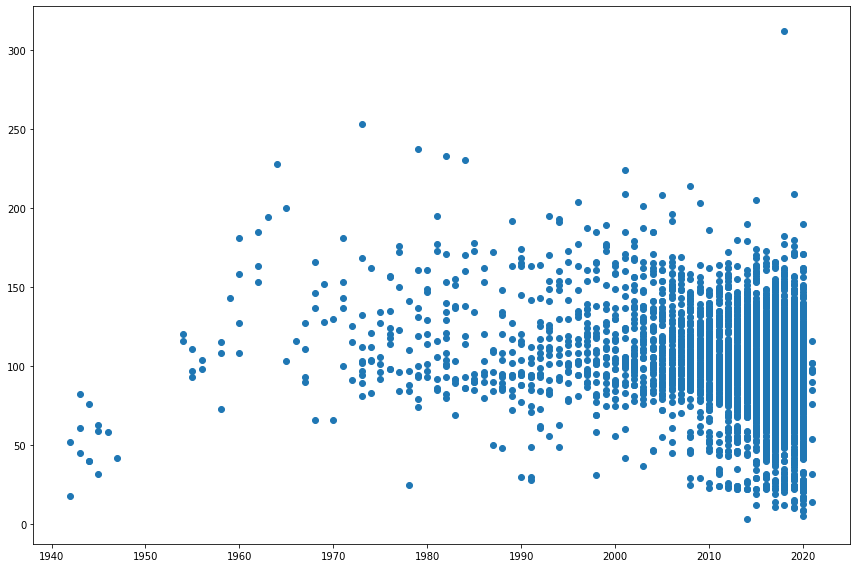

In [16]:
import matplotlib.pyplot as plt

plt.clf()

# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset["release_year"],netflix_movies_col_subset["duration"])

# Create a title
titleVar2=str("Movie Duration by Year of Release")
plt.title=(titleVar2)

# Show the plot
plt.show()

In [17]:
%%nose
# %%nose needs to be included at the beginning of every @tests cell

x_axis_data = netflix_movies_col_subset['release_year'].values
y_axis_data = netflix_movies_col_subset['duration'].values

last_input = In[-2]
import re

def test_fig_exists():
    assert re.search('fig\s*=\s*plt\.figure\(\s*figsize\s*\=\s*\(\s*12\s*\,\s*8\s*\)\s*\)', last_input), \
    'Make sure to leave the code to initialize `fig` unchanged, as this assists with testing!'
try:
    # Get figure labels
    title = fig.gca()._axes.get_title()

    # Concatenate lists to compare to test plot
    stu_yaxis = fig.gca().collections[0]._offsets.data[:,1].astype(int)
    stu_xaxis = fig.gca().collections[0]._offsets.data[:, 0].astype(int)

except:
    title = 'null'
    stu_yaxis = 'null'
    stu_xaxis = 'null'

def test_y_axis():
    assert stu_yaxis.all() == y_axis_data.all(), \
    'Are you correctly plotting `duration` on the y-axis?'
    
def test_x_axis():
    assert stu_xaxis.all() == x_axis_data.all(), \
    'Are you correctly plotting `release_date` on the x-axis?' 

def test_title():
    assert (re.search('Movie\s+Duration\s+by\s+Year\s+of\s+Release', title, re.IGNORECASE)), \
    'Did you give the correct title?'

3/4 tests passed; 1 failed
__main__.test_title
Traceback (most recent call last):
  File "/usr/lib/python3.6/unittest/case.py", line 59, in testPartExecutor
    yield
  File "/usr/lib/python3.6/unittest/case.py", line 605, in run
    testMethod()
  File "/usr/local/lib/python3.6/dist-packages/nose/case.py", line 198, in runTest
    self.test(*self.arg)
  File "<string>", line 35, in test_title
AssertionError: Did you give the correct title?



## 7. Digging deeper
<p>This is already much more informative than the simple plot we created when our friend first gave us some data. We can also see that, while newer movies are overrepresented on the platform, many short movies have been released in the past two decades.</p>
<p>Upon further inspection, something else is going on. Some of these films are under an hour long! Let's filter our DataFrame for movies with a <code>duration</code> under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.</p>

In [18]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration']<60]

# Print the first 20 rows of short_movies
print(short_movies[0:20])

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

In [19]:
%%nose
# %%nose needs to be included at the beginning of every @tests cell

last_input = In[-2]

import pandas as pd
import re

test_short_df = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]

def test_short_df_1():
    assert len(short_movies) != 446, \
    "Are you filtering `netflix_movies_col_subset` for movies **shorter** than 60 minutes?))"
    assert test_short_df.equals(short_movies), \
    "Did you correctly create the `short_movies` DataFrame by filtering for \
    movies with a `duration` fewer than 60 minutes?"

def test_print():
    assert (re.search("short_movies\[\s*0\s*\:\s*20\s*\]", last_input)) or \
    (re.search("short_movies\[\s*\:\s*20\s*\]", last_input)) or \
    (re.search("short_movies\.loc\[\s*\:\s*19", last_input)) or \
    (re.search("short_movies\.loc\[\s*0\s*\:\s*19", last_input)) or \
    (re.search("short_movies\.iloc\[\s*\:\s*20", last_input)) or \
    (re.search("short_movies\.iloc\[\s*0\s*\:\s*20", last_input)) or \
    (re.search("short_movies\[\s*\:\s*20\s*\]", last_input)) or \
    (re.search("short_movies\.head\(\s*20\s*\)", last_input)), \
    "Did you print the first twenty rows of your new `short_movies` DataFrame?"

2/2 tests passed


## 8. Marking non-feature films
<p>Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster. </p>
<p>We could eliminate these rows from our DataFrame and plot the values again. But another interesting way to explore the effect of these genres on our data would be to plot them, but mark them with a different color.</p>
<p>In Python, there are many ways to do this, but one fun way might be to use a loop to generate a list of colors based on the contents of the <code>genre</code> column. Much as we did in Intermediate Python, we can then pass this list to our plotting function in a later step to color all non-typical genres in a different color!</p>
<p><em>Note: Although we are using the basic colors of red, blue, green, and black, <code>matplotlib</code> has many named colors you can use when creating plots. For more information, you can refer to the documentation <a href="https://matplotlib.org/stable/gallery/color/named_colors.html">here</a>!</em></p>

In [20]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for thing1, row in netflix_movies_col_subset.iterrows() :
    if row['genre']=="Children":
        colors.append("red")
    elif row['genre']=="Documentaries":
        colors.append("blue")
    elif row['genre']=="Stand-up" :
        colors.append("green")
    else:
        colors.append("black")
        
# Inspect the first 10 values in your list        
print(colors[0:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


In [21]:
%%nose
# Define an empty list
colors_test = []

# Iterate over rows of netflix_movies
for lab, row in netflix_movies_col_subset.iterrows():
    if row['genre'] == "Children":
        colors_test.append("red")
    elif row['genre'] == "Documentaries":
        colors_test.append("blue")
    elif row['genre'] == "Stand-Up":
        colors_test.append("green")
    else :
        colors_test.append("black")
        
def test_colors_list():
    assert colors_test == colors, \
    "Did you correctly loop through your `netflix_movies` DataFrame, \
    and use the genre to append colors to your `colors` list? The first 9 values should be 'black', and the 10th should be `blue'."

0/1 tests passed; 1 failed
__main__.test_colors_list
Traceback (most recent call last):
  File "/usr/lib/python3.6/unittest/case.py", line 59, in testPartExecutor
    yield
  File "/usr/lib/python3.6/unittest/case.py", line 605, in run
    testMethod()
  File "/usr/local/lib/python3.6/dist-packages/nose/case.py", line 198, in runTest
    self.test(*self.arg)
  File "<string>", line 18, in test_colors_list
AssertionError: Did you correctly loop through your `netflix_movies` DataFrame,     and use the genre to append colors to your `colors` list? The first 9 values should be 'black', and the 10th should be `blue'.



## 9. Plotting with color!
<p>Lovely looping! We now have a <code>colors</code> list that we can pass to our scatter plot, which should allow us to visually inspect whether these genres might be responsible for the decline in the average duration of movies.</p>
<p>This time, we'll also spruce up our plot with some additional axis labels and a new theme with <code>plt.style.use()</code>. The latter isn't taught in Intermediate Python, but can be a fun way to add some visual flair to a basic <code>matplotlib</code> plot. You can find more information on customizing the style of your plot <a href="https://matplotlib.org/stable/tutorials/introductory/customizing.html">here</a>!</p>

TypeError: 'str' object is not callable

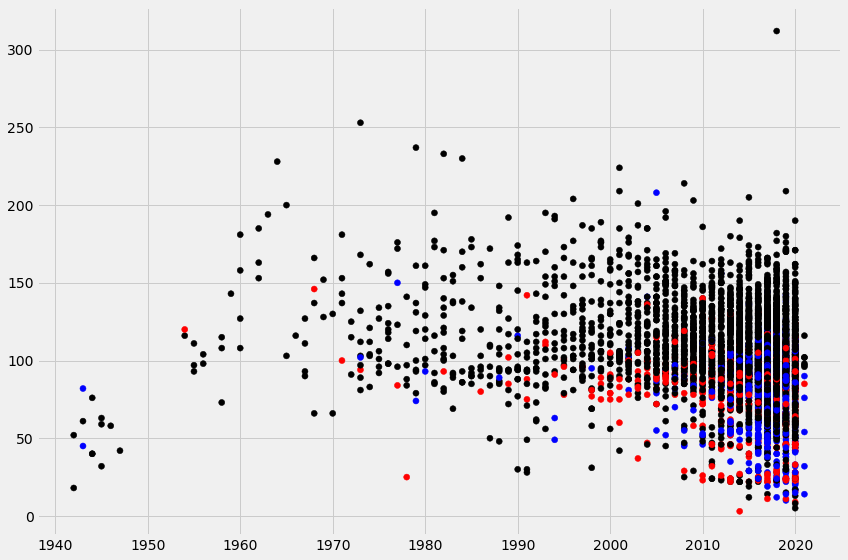

In [22]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset["release_year"],netflix_movies_col_subset["duration"],c=colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt(ylabel("duration"))
plt(xlabel("release year"))

# Show the plot
plt.show()

In [ ]:
%%nose
import numpy as np

x_axis_data = netflix_movies_col_subset["release_year"].values
y_axis_data = netflix_movies_col_subset["duration"].values
color_data = np.genfromtxt('datasets/color_data.csv', delimiter=',')

last_input = In[-2]
import re

def test_fig_exists():
    assert re.search('fig\s*=\s*plt\.figure\(\s*figsize\s*\=\s*\(\s*12\s*\,\s*8\s*\)\s*\)', last_input), \
    'Make sure to leave the code to initialize `fig` unchanged, as this assists with testing!'

try:
    # Get figure labels
    title = fig.gca()._axes.get_title()
    x_label = fig.gca()._axes.get_xlabel()
    y_label = fig.gca()._axes.get_ylabel()

    # Concatenate lists to compare to test plot
    stu_yaxis = fig.gca().collections[0]._offsets.data[:,1].astype(int)
    stu_xaxis = fig.gca().collections[0]._offsets.data[:, 0].astype(int)
    stu_colors = fig.gca().collections[0]._facecolors
except:
    title = 'null'
    x_label = 'null'
    y_label = 'null'
    stu_yaxis = 'null'
    stu_xaxis = 'null'
    stu_sizes = [0, 1]
    stu_colors = [0, 1]

def test_y_axis():
    assert stu_yaxis.all() == y_axis_data.all(), \
    'Are you correctly plotting `duration` on the y axis?'
    
def test_x_axis():
    assert stu_xaxis.all() == x_axis_data.all(), \
    'Are you correctly plotting `release_date` on the x axis?'
    
def test_colors():
    assert color_data.all() == stu_colors.all(), \
    'Are you correctly setting the colors according to the rating scheme provided?'

def test_labels():
    assert (re.search('movie\s+duration\s+by\s+year\s+of\s+release', title, re.IGNORECASE)), \
    'Did you give the correct title?'
    assert (re.search('release\s+year', x_label, re.IGNORECASE)), \
    'Did you set the correct x-axis label?'  
    assert (re.search('duration\s*\(\s*min\s*\)', y_label, re.IGNORECASE)), \
    'Did you set the correct y-axis label?'   

## 10. What next?
<p>Well, as we suspected, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. But we can't know for certain until we perform additional analyses. </p>
<p>Congratulations, you've performed an exploratory analysis of some entertainment data, and there are lots of fun ways to develop your skills as a Pythonic data scientist. These include learning how to analyze data further with statistics, creating more advanced visualizations, and perhaps most importantly, learning more advanced ways of working with data in <code>pandas</code>. This latter skill is covered in our fantastic course <a href="www.datacamp.com/courses/data-manipulation-with-pandas">Data Manipulation with pandas</a>.</p>
<p>We hope you enjoyed this application of the skills learned in Intermediate Python, and wish you all the best on the rest of your journey!</p>

In [ ]:
# Are we certain that movies are getting shorter?
are_movies_getting_shorter = 'no'

import numpy as np
numpy1=np.array([17, 28, 29, 30])
print(numpy1[0,-1])

In [ ]:
%%nose
import re
# %%nose needs to be included at the beginning of every @tests cell

def test_example():
    assert not re.match(are_movies_getting_shorter, "yes", re.IGNORECASE),\
    "It looks like you answered that we can be certain movies are getting shorter. \
    But based on our inspection of the data, it looks like there might be other factors at play \
    such as genre of movie!"